<!-- # Entropic Wasserstein barycenter via dual + log-domain Sinkhorn updates -->
# Sinkhorn (Entropic) Wasserstein barycenter

We are given $n$ input histograms (probability vectors)
$$
a^{(j)} \in \Delta_m,\qquad j=1,\dots,n,
$$
and barycenter weights
$$
\lambda \in \Delta_n,\qquad \lambda_j>0,\ \sum_{j=1}^n \lambda_j = 1,
$$
together with a cost matrix
$$
C \in \mathbb{R}^{m\times m}.
$$
The entropic Wasserstein barycenter problem is
$$
\min_{b\in \Delta_m}\ \sum_{j=1}^n \lambda_j, W_\varepsilon(a^{(j)}, b).
$$

### Dual form of entropic OT (one pair $(a, b)$)

For entropic OT between (a) and (b), one convenient dual form is
$$
W_\varepsilon(a,b) = 
   \max_{f,g\in \mathbb{R}^m}
   \langle f, a \rangle + \langle g, b \rangle
   - \varepsilon \sum_{i,k}^{m} \exp \left(\frac{f_i + g_k - C_{ik}}{\varepsilon} \right),
$$
where $f$ and $g$ are the dual potentials.

For the barycenter objective this gives
$$
\min_{b \in \Delta_m}
   \sum_{j=1}^n \lambda_j
      \max_{f^{(j)},g^{(j)} \in \mathbb{R}^m}
   \left[
      \langle f^{(j)}, a^{(j)} \rangle + \langle g^{(j)}, b \rangle
      - \varepsilon \sum_{i,k}^{m} \exp \left( \frac{f^{(j)}_i+g^{(j)}_k-C_{ik}}{\varepsilon} \right)
   \right].
$$

Under standard convexity/concavity conditions (the entropic regularization makes things well-behaved), we can swap $\min_b$ and $\max$ (min–max theorem) and isolate the $b$-dependent term:
$$
\max_{{f^{(j)}, g^{(j)}}}
\left\{
   \sum_{j=1}^n \lambda_j \langle f^{(j)}, a^{(j)}\rangle
      + \min_{b\in\Delta_m} \left\langle \sum_{j=1}^n \lambda_j g^{(j)},\ b \right\rangle
      - \varepsilon\sum_{j=1}^n \lambda_j
         \sum_{i,k}^{m} \exp \left( \frac{f^{(j)}_i + g^{(j)}_k - C_{ik}}{\varepsilon} \right)
\right\}.
$$

---

### Why a constraint $\sum_j \lambda_j \; g^{(j)} = 0$ appears

The term
$$
\min_{b \in \Delta_m}
   \left\langle \sum_{j=1}^n \lambda_j g^{(j)} , b \right\rangle
$$
is a linear minimization over the simplex.

<!-- Since $b$ is free to put mass on the smallest coordinates,
the only way the full saddle problem stays “balanced” (and consistent with the barycenter coupling constraints across all $j$)
is that the weighted sum of barycenter-side potentials is constant;
using the usual gauge freedom of OT potentials (we can shift $g$ by constants),
we choose the gauge -->
$$
   \sum_{j=1}^n \lambda_j g^{(j)} = 0 .
$$

Now introduce log-domain scaling variables:
$$
   f^{(j)} = \varepsilon \log u^{(j)} , \qquad
   g^{(j)} = \varepsilon \log v^{(j)} .
$$
Then the condition $\sum_j \lambda_j g^{(j)}=0$ becomes (componentwise)
$$
   \sum_{j=1}^n \lambda_j \log v^{(j)} = 0
   \qquad \Longleftrightarrow \qquad
   \prod_{j=1}^n \left( v^{(j)} \right)^{\lambda_j} = \mathbf{1}.
$$

---

### Log-domain Sinkhorn updates for each $(a^{(j)}, b)$

Define the Gibbs kernel
$$
   K = \exp \left( - \frac{C}{\varepsilon} \right) .
$$
For a fixed $b$, the entropic OT coupling for each $j$ has the scaled form
$$
   P^{(j)} = \operatorname{diag}(u^{(j)})  K  \operatorname{diag}(v^{(j)}) ,
$$
with marginal constraints
$$
P^{(j)} \mathbf{1} = a^{(j)} , \qquad (P^{(j)})^T \mathbf{1} = b.
$$
In the **log domain**, the usual Sinkhorn updates become **log-sum-exp** updates for the potentials:

**(1) Update $f^{(j)}$ given $g^{(j)}$:**
$$
f^{(j)}_i \leftarrow
   \varepsilon \log a^{(j)}_i
   - \varepsilon \log \left( \sum_{k=1}^m
      \exp \left(
         \frac{g^{(j)}_k - C_{ik}}{\varepsilon}
      \right)
   \right) .
$$

**(2) Update $g^{(j)}$ given $f^{(j)}$ and $b$:**
$$
g^{(j)}_k \leftarrow
   \varepsilon \log b
   - \varepsilon \log \left(\sum_{i=1}^m
   \exp \left(
         \frac{f^{(j)}_i - C_{ik}}{\varepsilon}
      \right)
   \right) .
$$

These are exactly the “stable” log-domain versions of
$$
u^{(j)} \leftarrow \frac{a^{(j)}}{K v^{(j)}},
\qquad
v^{(j)} \leftarrow \frac{b}{K^T u^{(j)}}.
$$

### Deriving the barycenter update $b$ (the geometric mean step)

From the standard Sinkhorn relation (second marginal constraint) we have, for each $j$,
$$
b = v^{(j)} \odot ( K^T u^{(j)} ) ,
$$
so in log-domain:
$$
\log b = \log v^{(j)} + \log ( K^T u^{(j)} ) .
$$

Now take the weighted average over $j$ with weights $\lambda_j$:
$$
\log b = 
   \sum_{j=1}^n \lambda_j \log v^{(j)}
   + \sum_{j=1}^n \lambda_j \log( K^T u^{(j)} ) .
$$

Using the gauge condition from above,
$$
\sum_{j=1}^n \lambda_j \log v^{(j)} = 0 ,
$$
we obtain the barycenter update
$$
\boxed{
   \log b = 
   \sum_{j=1}^n \lambda_j \log( K^T u^{(j)} )
}
\qquad\Longleftrightarrow\qquad
\boxed{
   b \; \propto \; \prod_{j=1}^{n} \exp \left(
            K^T u^{(j)} \right)^{\lambda_j} .
}
$$

So $b$ is the **weighted geometric mean** of the vectors $(K^T u^{(j)})$.

In practice we finally renormalize:
$$
b \leftarrow \frac{b}{\langle b , \mathbf{1} \rangle}.
$$

---

### Summary: one stable log-domain barycenter iteration

Given current potentials $f^{(j)}, g^{(j)}$:

1. For each $j$, update $f^{(j)}$ by log-sum-exp using $g^{(j)}$ and $a^{(j)}$.
   $$
   f^{(j)}_i \leftarrow
      \varepsilon \log a^{(j)}_i
      - \varepsilon \log \left( \sum_{k=1}^m
         \exp \left(
            \frac{g^{(j)}_k - C_{ik}}{\varepsilon}
         \right)
      \right) .
   $$

2. Compute $\log(K^T u^{(j)})$ in a stable way:
   $$
   \log(K^T u^{(j)})_k = 
      \log \left(
         \sum_{i=1}^m \exp \left( \frac{f^{(j)}_i - C_{ik}}{\varepsilon} \right)
         \right).
   $$

3. Update barycenter:
   <!-- $$
   \log b \leftarrow
      \sum_{j=1}^n \lambda_j \log(K^T u^{(j)}),
   \qquad
   b \leftarrow \frac{\exp(\log b)}{\langle \exp(\log b),\mathbf{1}\rangle}.
   $$ -->
   $$
   \log b \leftarrow
      \sum_{j=1}^n \lambda_j \log(K^T u^{(j)}) ,
   \qquad
   b \leftarrow \operatorname{Normalize} \left( \exp(\log b) \right).
   $$

4. For each $j$, update $g^{(j)}$ using the new $b$:
   $$
   g^{(j)}_k
   \leftarrow
      \varepsilon \log b
      - \varepsilon \log \left(
         \sum_{i=1}^m \exp \left(
               \frac{f^{(j)}_i - C_{ik}}{\varepsilon}
            \right)
         \right).
   $$

This works because we are doing **block coordinate ascent on the concave dual** (exact maximizers in $f^{(j)}$ and $g^{(j)}$ given the other blocks), combined with the barycenter block update that enforces the shared second marginal consistently across all $j$ via the geometric-mean formula.

In [ ]:
import sys, os
from itertools import islice
from jax import config

os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'
os.environ['XLA_PYTHON_CLIENT_ALLOCATOR'] = 'platform'
config.update('jax_enable_x64', True)

import jax.numpy as jnp
from jax import lax
from jax import jit
from jax.scipy.special import logsumexp

import numpy as np
import matplotlib.pyplot as plt

from uot.problems.generators.toy_barycenter_generator import ToyBarycenterGenerator, RoundRobinSelector, FixedListSelector
from uot.utils import costs
from uot.utils.notebook_helpers import barycenter_inputs


In [2]:
gen = ToyBarycenterGenerator(
    selector=RoundRobinSelector((
        ('Plus', 'Star', 'Crescent'),
        ('GMM', 'Ring', 'Square'),
    )),
    n_points=128,
    cost_fn=costs.cost_euclid_squared,
    num_datasets=5,
    measure_mode='discrete',
)

problem_iter = gen.generate(num_marginals=3)
problem, problem_rr = list(islice(problem_iter, 2))


In [3]:
def plot_measure(ax, measure, title, cmap='Greys'):
    if hasattr(measure, 'weights_nd') and hasattr(measure, 'axes'):
        axes = measure.axes
        weights = np.asarray(measure.weights_nd)
        extent = (float(axes[0][0]), float(axes[0][-1]), float(axes[1][0]), float(axes[1][-1]))
        image = ax.imshow(weights.T, extent=extent, cmap=cmap)
        ax.set_title(title)
        return image

    points, weights = measure.to_discrete()
    points = np.asarray(points)
    weights = np.asarray(weights)
    if points.ndim == 1:
        points = points.reshape(-1, 1)
    if points.shape[1] == 1:
        ax.plot(points[:, 0], weights)
    else:
        ax.scatter(points[:, 0], points[:, 1], c=weights, s=8, cmap=cmap)
    ax.set_title(title)
    ax.set_axis_off()

def plot_barycenter(ax, barycenter, reference_measure, title, support=None, cmap='Greys'):
    weights = np.asarray(barycenter).reshape(-1)
    if support is not None:
        points = np.asarray(support)
        if points.ndim == 1:
            points = points.reshape(-1, 1)
        if points.shape[0] != weights.shape[0]:
            raise ValueError('Support size does not match barycenter weights')
        if points.shape[1] == 1:
            ax.plot(points[:, 0], weights)
        else:
            ax.scatter(points[:, 0], points[:, 1], c=weights, s=8, cmap=cmap)
        ax.set_title(title)
        ax.set_axis_off()
        return

    if hasattr(reference_measure, 'weights_nd') and hasattr(reference_measure, 'axes'):
        axes = reference_measure.axes
        shape = np.asarray(reference_measure.weights_nd).shape
        if weights.size == int(np.prod(shape)):
            weights = weights.reshape(shape)
            extent = (float(axes[0][0]), float(axes[0][-1]), float(axes[1][0]), float(axes[1][-1]))
            image = ax.imshow(weights.T, extent=extent, cmap=cmap)
            ax.set_title(title)
            ax.set_axis_off()
            return image

    points, _ = reference_measure.to_discrete()
    points = np.asarray(points)
    if points.ndim == 1:
        points = points.reshape(-1, 1)
    if points.shape[0] != weights.shape[0]:
        raise ValueError('Reference support size does not match barycenter weights')
    if points.shape[1] == 1:
        ax.plot(points[:, 0], weights)
    else:
        ax.scatter(points[:, 0], points[:, 1], c=weights, s=8, cmap=cmap)
    ax.set_title(title)
    ax.set_axis_off()


In [4]:
@jit(static_argnames=[
    'reg',
    'maxiter',
    'return_diagnostics',
])
def barycenter_sinkhorn(
        measures: jnp.ndarray,
        cost: jnp.ndarray,
        lambdas: jnp.ndarray,
        reg: float = 1e-3,
        tol: float = 1e-4,
        maxiter: int = 100,
        return_diagnostics: bool = False,
        error_check_every: int = 20,
):
    # lambdas = lambdas / lambdas.sum()
    lam = (lambdas / lambdas.sum())[:, None]   # (J,1)
    # clip measures for log computations to be a little bit safer in practice
    log_measures = jnp.log(jnp.maximum(measures, 1e-30))
    lnb = jnp.zeros_like(measures[0])
    lnK = -cost / reg

    def cond_fn(state):
        i, lnus, lnvs, lnb, err, errors = state
        return jnp.logical_and(i < maxiter, err > tol)

    def body_fn(state):
        i, lnus, lnvs, lnb, err, errors = state

        # update each f^j
        ln_Kv = logsumexp(
            lnvs[:, None, :] + lnK[None, :, :],
            axis=2,
        )
        lnus = log_measures - ln_Kv
        # compute log(K^T u^j) in a stable way
        ln_Ktu = logsumexp(
            lnus[:, :, None] + lnK[None, :, :],
            axis=1,
        )
        # update barycenter log(b)
        lnb = jnp.sum(lam * ln_Ktu, axis=0)
        lnb = lnb - logsumexp(lnb)   # now renormalize
        # update each g^j
        lnvs = lnb[None, :] - ln_Ktu
        def compute_err(_):
            new_err, _details = marginal_error_from_log(log_measures, lnK, lnus,
                                                        lnvs, lnb)
            # new_err = marginal_error_from_cached(log_measures, lnus, lnvs, lnb, ln_Kv, ln_Ktu)
            return new_err
        err = lax.cond(
            (i % error_check_every) == 0,
            compute_err,
            lambda _: err,
            operand=None,
        )
        errors = errors.at[i].set(err)
        return (i+1, lnus, lnvs, lnb, err, errors)

    lnus = jnp.zeros_like(measures)
    lnvs = jnp.zeros_like(measures)
    errors = jnp.full((maxiter,), jnp.nan)
    err0 = jnp.asarray(jnp.inf)
    init_state = (jnp.asarray(0), lnus, lnvs, lnb, err0, errors)
    final_state = lax.while_loop(cond_fn, body_fn, init_state)
    iterations, lnus, lnvs, lnb, err, errors = final_state
    b = jnp.exp(lnb)
    b /= b.sum()
    diagnostics = {
        'iterations': iterations,
        'error': err,
        **({
            'ln_u': lnus,
            'ln_v': lnvs,
            'ln_b': lnb,
            'errors': errors,
            } if return_diagnostics else {}),
        }
    return b, diagnostics


def marginal_error_from_log(
    log_measures: jnp.ndarray,  # (J, N) = log(a_j)
    lnK: jnp.ndarray,           # (N, N) = -C/reg
    lnus: jnp.ndarray,          # (J, N) = log(u_j)
    lnvs: jnp.ndarray,          # (J, N) = log(v_j)
    lnb: jnp.ndarray,           # (N,)   = log(b)
    eps: float = 1e-30,
):
    # ln(K v_j) and ln(K^T u_j)
    lnKv = logsumexp(lnvs[:, None, :] + lnK[None, :, :], axis=2)    # (J, N)
    lnKtu = logsumexp(lnus[:, :, None] + lnK[None, :, :], axis=1)   # (J, N)
    # implied marginals in normal domain
    a_hat = jnp.exp(lnus + lnKv)                 # (J, N) should match exp(log_measures)
    b_hat = jnp.exp(lnvs + lnKtu)                # (J, N) should match exp(lnb)[None,:]

    a = jnp.exp(log_measures)                    # (J, N)
    b = jnp.exp(lnb)                             # (N,)
    # L2 errors per measure
    err_a_per_j = jnp.sum(jnp.power(a_hat - a, 2), axis=1)           # (J,)
    err_b_per_j = jnp.sum(jnp.power(b_hat - b[None, :], 2), axis=1)  # (J,)

    err_a = jnp.max(err_a_per_j)
    err_b = jnp.max(err_b_per_j)
    err = jnp.maximum(err_a, err_b)
    return err, {"err_a": err_a, "err_b": err_b}

iterations = 41
error = 8.172953683579007e-05


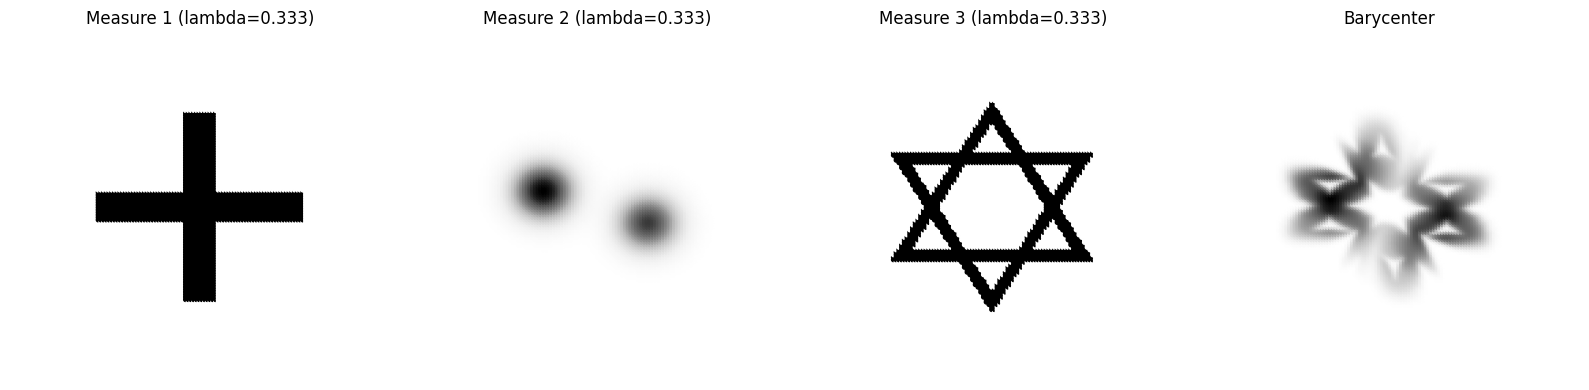

In [5]:
measures, lambdas, cost, meas_array, support = barycenter_inputs(problem, support_mode="shared", shared_mode="union", return_support=True)
b, info = barycenter_sinkhorn(
    measures=meas_array,
    cost=cost,
    lambdas=lambdas,
    reg=1e-4,
    tol=1e-4,
    maxiter=100,
    return_diagnostics=True,
)
print(f"iterations = {info['iterations']}")
print(f"error = {info['error']}")

num_measures = len(measures)
fig, axes = plt.subplots(1, num_measures + 1, figsize=(4 * (num_measures + 1), 4))
if num_measures == 1:
    axes = [axes]

lambda_values = np.asarray(lambdas) if lambdas is not None else None

for idx, measure in enumerate(measures):
    name = getattr(measure, 'name', '') or f'Measure {idx + 1}'
    if lambda_values is not None:
        lambda_val = float(lambda_values[idx])
        title = f'{name} (lambda={lambda_val:.3f})'
    else:
        title = name
    plot_measure(axes[idx], measure, title)

plot_barycenter(axes[-1], b, measures[0], 'Barycenter', support=support)

fig.tight_layout()
plt.show()


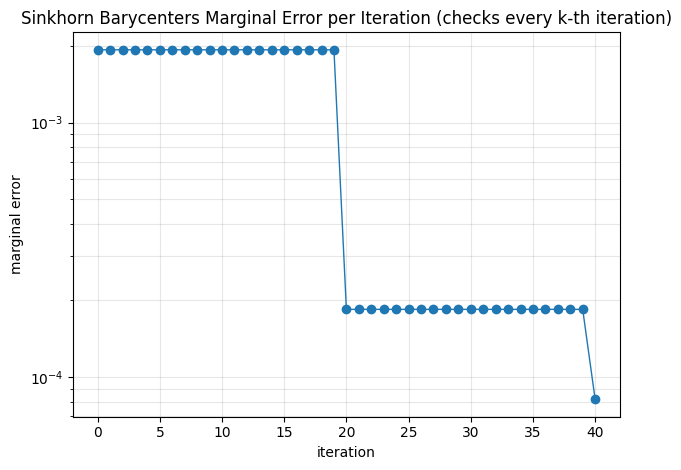

In [6]:
errs = np.asarray(info["errors"])
x = np.arange(errs.size)
plt.figure()
plt.plot(x, errs, marker="o", linewidth=1)
plt.xlabel("iteration")
plt.ylabel("marginal error")
plt.yscale("log")
plt.grid(True, which="both", alpha=0.3)
plt.title('Sinkhorn Barycenters Marginal Error per Iteration (checks every k-th iteration)')
plt.tight_layout()
plt.show()

iterations = 21
error = 4.0309674576458986e-05


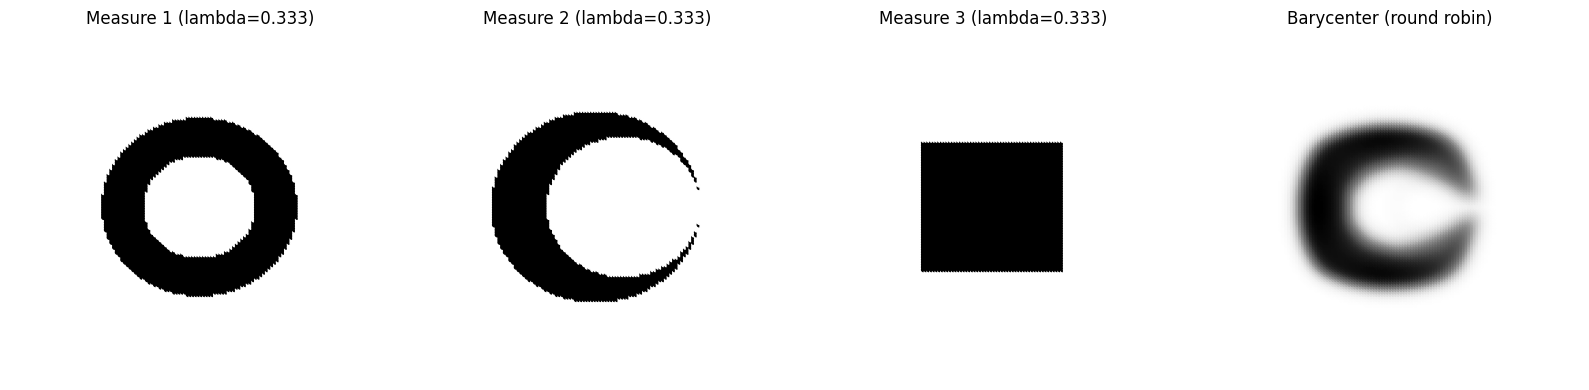

In [7]:
measures, lambdas, cost, meas_array, support = barycenter_inputs(problem_rr, support_mode="shared", shared_mode="union", return_support=True)
b, info = barycenter_sinkhorn(
    measures=meas_array,
    cost=cost,
    lambdas=lambdas,
    reg=1e-3,
    tol=1e-4,
    maxiter=100,
    return_diagnostics=True,
)
print(f'iterations = {info["iterations"]}')
print(f"error = {info['error']}")

num_measures = len(measures)
fig, axes = plt.subplots(1, num_measures + 1, figsize=(4 * (num_measures + 1), 4))
if num_measures == 1:
    axes = [axes]

lambda_values = np.asarray(lambdas) if lambdas is not None else None

for idx, measure in enumerate(measures):
    name = getattr(measure, 'name', '') or f'Measure {idx + 1}'
    if lambda_values is not None:
        lambda_val = float(lambda_values[idx])
        title = f'{name} (lambda={lambda_val:.3f})'
    else:
        title = name
    plot_measure(axes[idx], measure, title)

plot_barycenter(axes[-1], b, measures[0], 'Barycenter (round robin)', support=support)

fig.tight_layout()
plt.show()


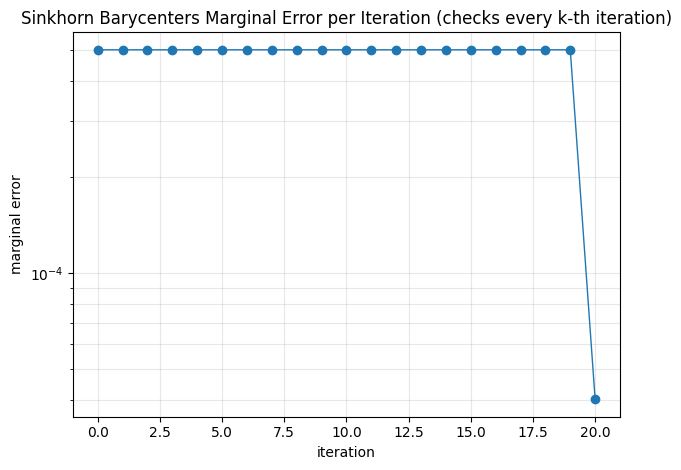

In [8]:
errs = np.asarray(info["errors"])
x = np.arange(errs.size)
plt.figure()
plt.plot(x, errs, marker="o", linewidth=1)
plt.xlabel("iteration")
plt.ylabel("marginal error")
plt.yscale("log")
plt.grid(True, which="both", alpha=0.3)
plt.title('Sinkhorn Barycenters Marginal Error per Iteration (checks every k-th iteration)')
plt.tight_layout()
plt.show()

In [9]:
gen = ToyBarycenterGenerator(
    selector=FixedListSelector(('Plus', 'Star', 'Crescent')),
    n_points=128,
    cost_fn=costs.cost_euclid_squared,
    num_datasets=5,
    measure_mode='discrete',
)

problem_iter = gen.generate(num_marginals=3)
problem, problem_rr = list(islice(problem_iter, 2))


iterations = 61
error = 9.183788536834148e-05


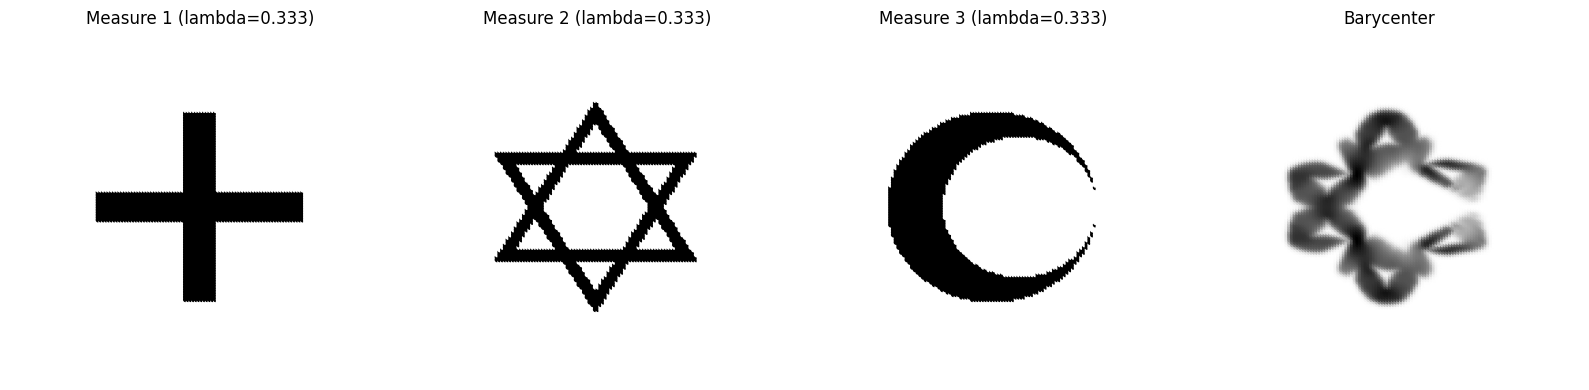

In [10]:
measures, lambdas, cost, meas_array, support = barycenter_inputs(problem, support_mode="shared", shared_mode="union", return_support=True)
b, info = barycenter_sinkhorn(
    measures=meas_array,
    cost=cost,
    lambdas=lambdas,
    reg=1e-4,
    tol=1e-4,
    maxiter=130,
)
print(f"iterations = {info['iterations']}")
print(f"error = {info['error']}")

num_measures = len(measures)
fig, axes = plt.subplots(1, num_measures + 1, figsize=(4 * (num_measures + 1), 4))
if num_measures == 1:
    axes = [axes]

lambda_values = np.asarray(lambdas) if lambdas is not None else None

for idx, measure in enumerate(measures):
    name = getattr(measure, 'name', '') or f'Measure {idx + 1}'
    if lambda_values is not None:
        lambda_val = float(lambda_values[idx])
        title = f'{name} (lambda={lambda_val:.3f})'
    else:
        title = name
    plot_measure(axes[idx], measure, title)

plot_barycenter(axes[-1], b, measures[0], 'Barycenter', support=support)

fig.tight_layout()
plt.show()


iterations = 21
error = 3.903586546433969e-05


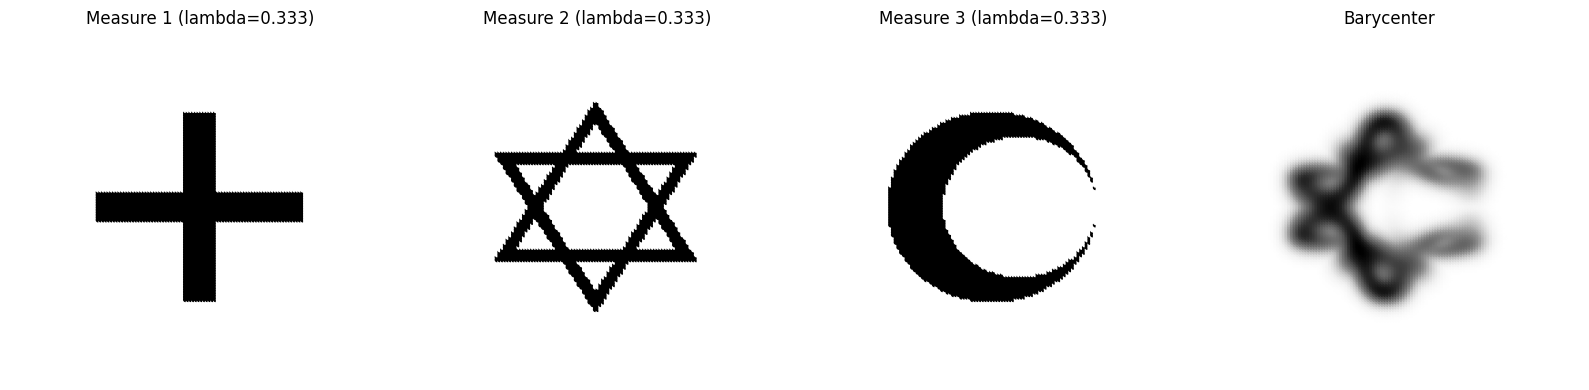

In [11]:
from uot.solvers.sinkhorn.barycenter import barycenter_sinkhorn as bsinkhorn

measures, lambdas, cost, meas_array, support = barycenter_inputs(problem, support_mode="shared", shared_mode="union", return_support=True)

b, info = bsinkhorn(
    measures=meas_array,
    cost=cost,
    lambdas=lambdas,
    reg=1e-3,
    tol=1e-4,
    maxiter=50,
)
print(f"iterations = {info['iterations']}")
print(f"error = {info['error']}")

num_measures = len(measures)
fig, axes = plt.subplots(1, num_measures + 1, figsize=(4 * (num_measures + 1), 4))
if num_measures == 1:
    axes = [axes]

lambda_values = np.asarray(lambdas) if lambdas is not None else None

for idx, measure in enumerate(measures):
    name = getattr(measure, 'name', '') or f'Measure {idx + 1}'
    if lambda_values is not None:
        lambda_val = float(lambda_values[idx])
        title = f'{name} (lambda={lambda_val:.3f})'
    else:
        title = name
    plot_measure(axes[idx], measure, title)

plot_barycenter(axes[-1], b, measures[0], 'Barycenter', support=support)

fig.tight_layout()
plt.show()

iterations = 41
error = 3.9591067687207016e-05


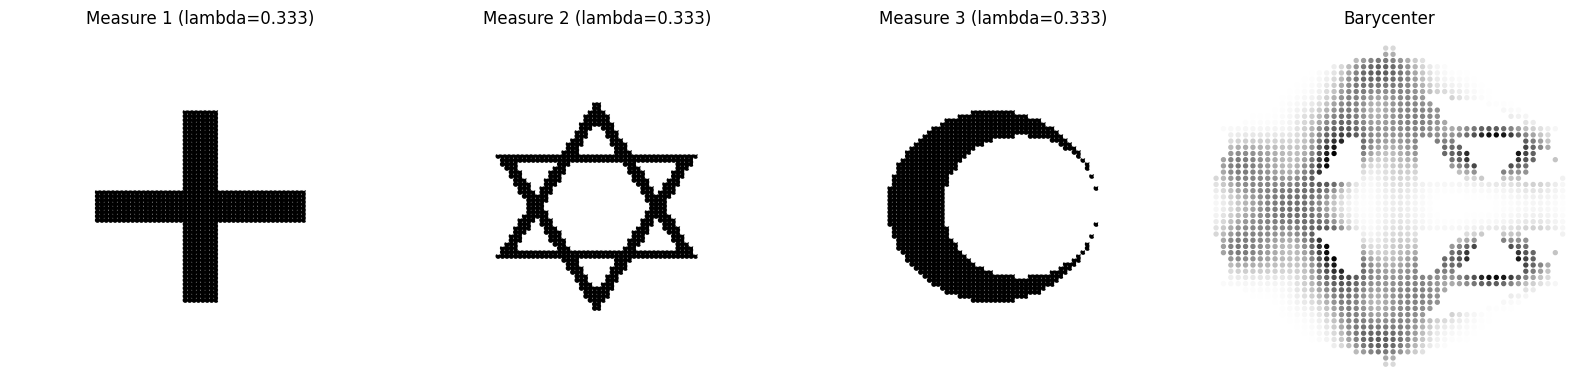

In [12]:
gen = ToyBarycenterGenerator(
    selector=FixedListSelector(('Plus', 'Star', 'Crescent')),
    n_points=80,
    cost_fn=costs.cost_euclid_squared,
    num_datasets=5,
    measure_mode='discrete',
)

problem_iter = gen.generate(num_marginals=3)
problem, problem_rr = list(islice(problem_iter, 2))

measures, lambdas, cost, meas_array, support = barycenter_inputs(problem, support_mode="shared", shared_mode="union", include_zeros=False, return_support=True)
b, info = bsinkhorn(
    measures=meas_array,
    cost=cost,
    lambdas=lambdas,
    reg=1e-3,
    tol=1e-4,
    maxiter=50,
)
print(f"iterations = {info['iterations']}")
print(f"error = {info['error']}")


num_measures = len(measures)
fig, axes = plt.subplots(1, num_measures + 1, figsize=(4 * (num_measures + 1), 4))
if num_measures == 1:
    axes = [axes]

lambda_values = np.asarray(lambdas) if lambdas is not None else None

for idx, measure in enumerate(measures):
    name = getattr(measure, 'name', '') or f'Measure {idx + 1}'
    if lambda_values is not None:
        lambda_val = float(lambda_values[idx])
        title = f'{name} (lambda={lambda_val:.3f})'
    else:
        title = name
    plot_measure(axes[idx], measure, title)

plot_barycenter(axes[-1], b, measures[0], 'Barycenter', support=support)

fig.tight_layout()
plt.show()